In [1]:
import sys

import os
print(os.getcwd())

/Users/schnuckiputz/other/git/2022-CHI-neuroadaptive-haptics/neuro_haptics/aleks


In [2]:
sys.path.append('rl/')
print(sys.path) 

import utils
from utils import *

['/Users/schnuckiputz/other/git/2022-CHI-neuroadaptive-haptics/neuro_haptics/aleks', '/opt/homebrew/Caskroom/miniforge/base/lib/python39.zip', '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9', '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/lib-dynload', '', '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages', '/Users/schnuckiputz/other/code/brain-course-drl-project/gym-grid', '/Users/schnuckiputz/other/git/sam-hq', 'rl/']


In [3]:
print(sys.path) 

['/Users/schnuckiputz/other/git/2022-CHI-neuroadaptive-haptics/neuro_haptics/aleks', '/opt/homebrew/Caskroom/miniforge/base/lib/python39.zip', '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9', '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/lib-dynload', '', '/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages', '/Users/schnuckiputz/other/code/brain-course-drl-project/gym-grid', '/Users/schnuckiputz/other/git/sam-hq', 'rl/']


In [4]:
import pandas as pd

  0%|          | 0/20 [00:00<?, ?it/s]/Users/schnuckiputz/other/git/2022-CHI-neuroadaptive-haptics/neuro_haptics/aleks/rl/ucbq_agent.py:77: RuntimeWarning: invalid value encountered in sqrt
  self.Q[state] + self.ucb_c * np.sqrt(np.divide(np.log(self.t), self.N[state], where=self.N[state]!=0)))
100%|██████████| 20/20 [00:00<00:00, 90.75it/s]


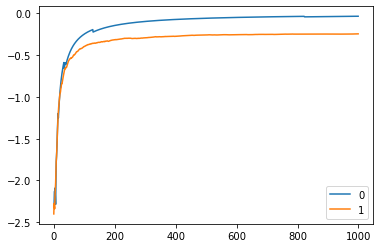

In [5]:
rewards = []

params_new = {
    # Runner parameters
    'max_steps': 1000,
    'num_episodes': 20,
    'convergence_count_start': 1000,
    'epsilon': 0,
    'gamma': 1
    }

params = default_params() | params_new

from ucbq_agent_stateless import UCBQAgent

# params['surrogate'] = True
params['agent'] = UCBQAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
rewards.append(rewards_all_experiments)

# Apply get_mean_rewards_across_episodes to each element in rewards
mean_rewards = [[get_mean_rewards_across_episodes(rewards_all_experiments) for rewards_all_experiments in rewards]]

# pd.DataFrame(mean_rewards).T.plot()

rewards = []

params_new = {
    # 'epsilon': 0.01
    'epsilon': 0.1
    }

params = params | params_new

from e_greedy_agent import EGreedyAgent

# params['surrogate'] = True
params['agent'] = EGreedyAgent
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, last_reward_processor = qLearningExperiment(params=params)
rewards.append(rewards_all_experiments)


# Apply get_mean_rewards_across_episodes to each element in rewards
mean_rewards.append([get_mean_rewards_across_episodes(rewards_all_experiments) for rewards_all_experiments in rewards])

df_mean_rewards = pd.DataFrame(mean_rewards[0]).T
df_mean_rewards[1] = pd.DataFrame(mean_rewards[1]).T
df_mean_rewards.plot()

In [6]:
print_agent_stats(params['agent'] )

Total rewards:


AttributeError: type object 'EGreedyAgent' has no attribute 'rewards'